In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445038 entries, 0 to 445037
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     445038 non-null  object 
 1   date                                        445038 non-null  object 
 2   total_cases                                 432500 non-null  float64
 3   new_cases                                   430630 non-null  float64
 4   new_cases_smoothed                          429404 non-null  float64
 5   total_cases_per_million                     432500 non-null  float64
 6   new_cases_per_million                       430630 non-null  float64
 7   new_cases_smoothed_per_million              429404 non-null  float64
 8   total_deaths                                432500 non-null  float64
 9   new_deaths                                  431135 non-null  float64
 

In [ ]:
print(df.describe())


        total_cases     new_cases  new_cases_smoothed  \
count  4.325000e+05  4.306300e+05        4.294040e+05   
mean   1.252820e+07  1.258315e+04        1.261785e+04   
std    6.779492e+07  2.914043e+05        1.096769e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00   
25%    6.825000e+03  0.000000e+00        0.000000e+00   
50%    6.897500e+04  0.000000e+00        1.171429e+01   
75%    9.522860e+05  0.000000e+00        3.368571e+02   
max    7.764709e+08  4.423623e+07        6.319461e+06   

       total_cases_per_million  new_cases_per_million  \
count            432500.000000          430630.000000   
mean             114551.066197             118.034147   
std              164561.288972            1476.816987   
min                   0.000000               0.000000   
25%                2154.434850               0.000000   
50%               31589.941000               0.000000   
75%              159265.802500               0.000000   
max              766064.800000

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
df.fillna(0, inplace=True)


country                            0
date                               0
total_cases                    12538
new_cases                      14408
new_cases_smoothed             15634
                               ...  
extreme_poverty               165492
diabetes_prevalence            70319
handwashing_facilities        243748
hospital_beds_per_thousand    177253
human_development_index       107934
Length: 61, dtype: int64


In [ ]:
# Drop irrelevant columns (if any)
# Convert date columns to datetime format
df['date'] = pd.to_datetime(df['date'])


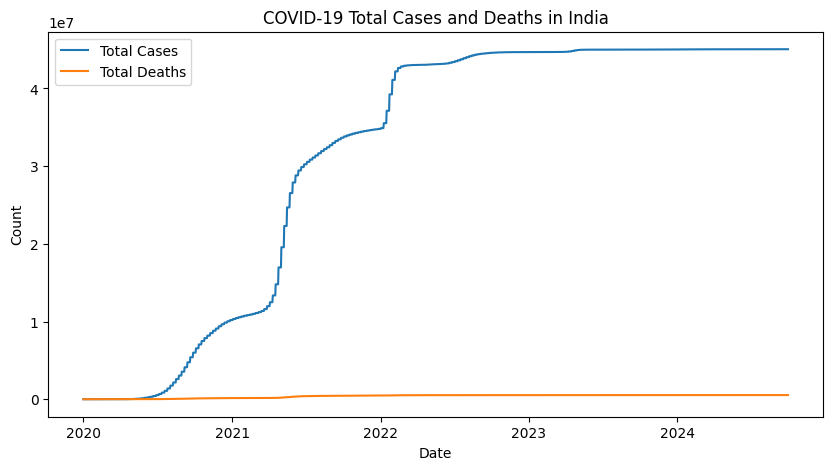

In [ ]:
# Filter for a specific country (e.g., India)
india_data = df[df['country'] == 'India']

# Plot total cases and deaths over time
plt.figure(figsize=(10, 5))
plt.plot(india_data['date'], india_data['total_cases'], label='Total Cases')
plt.plot(india_data['date'], india_data['total_deaths'], label='Total Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Total Cases and Deaths in India')
plt.legend()
plt.show()


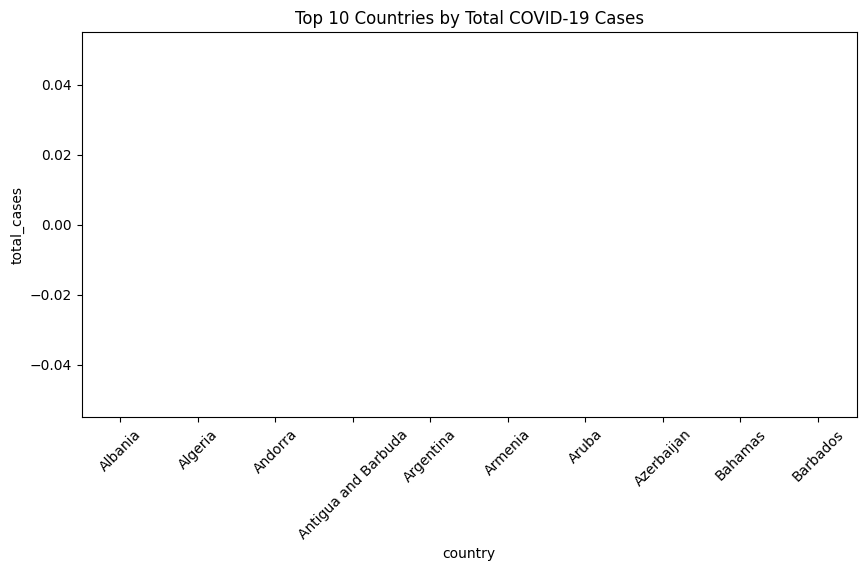

In [ ]:
# Group data by country and analyze the latest available data
latest_data = df[df['date'] == df['date'].max()]
top_countries = latest_data.nlargest(10, 'total_cases')

# Plot total cases for top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='total_cases', data=top_countries)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()


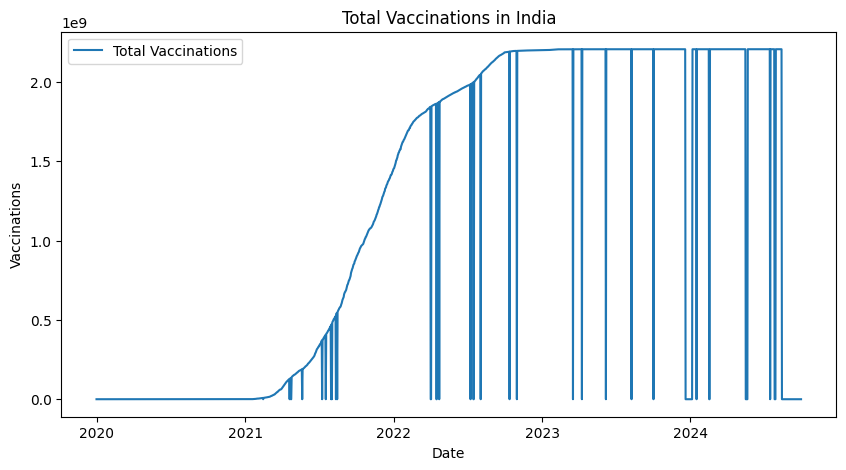

In [ ]:
# Plot total vaccinations over time for India
plt.figure(figsize=(10, 5))
plt.plot(india_data['date'], india_data['total_vaccinations'], label='Total Vaccinations')
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.title('Total Vaccinations in India')
plt.legend()
plt.show()


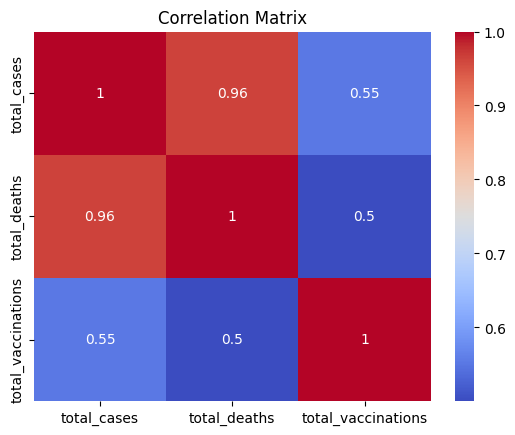

In [ ]:
# Correlation matrix
corr_matrix = df[['total_cases', 'total_deaths', 'total_vaccinations']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


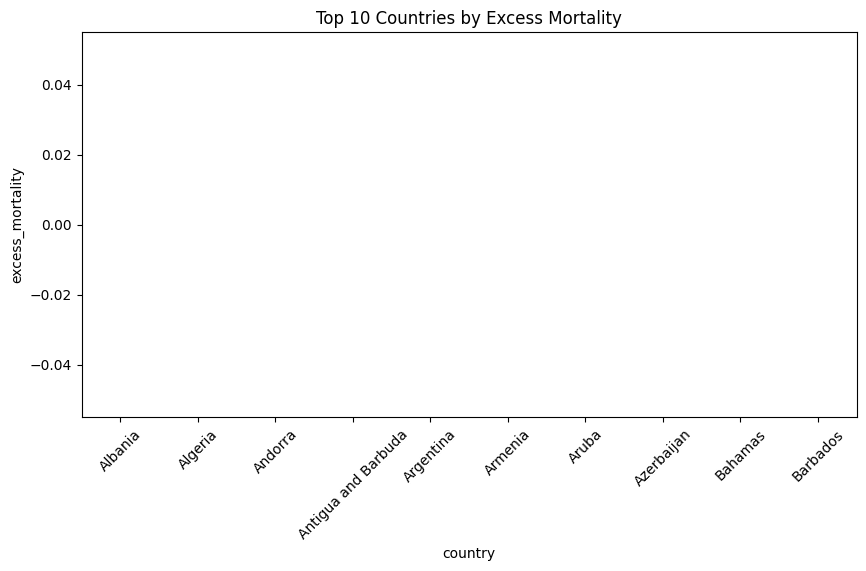

In [ ]:
# Compare excess mortality across different countries
latest_excess_mortality = latest_data.nlargest(10, 'excess_mortality')
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='excess_mortality', data=latest_excess_mortality)
plt.title('Top 10 Countries by Excess Mortality')
plt.xticks(rotation=45)
plt.show()


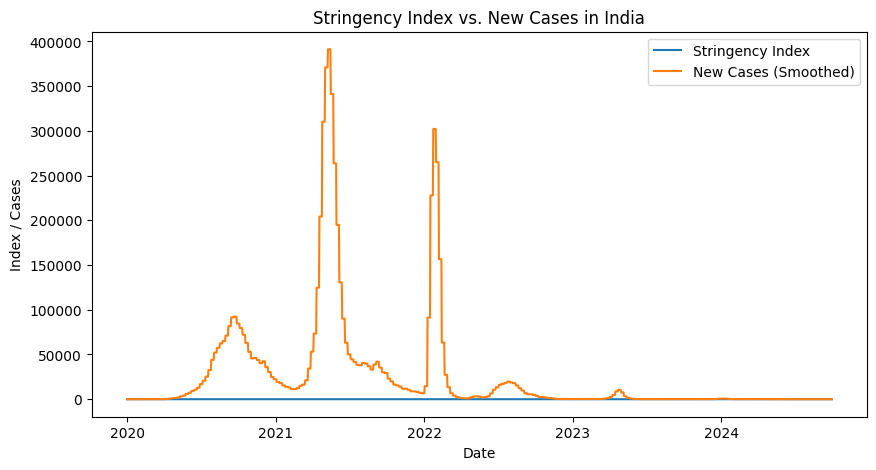

In [ ]:
# Plot stringency index over time and compare with new cases for India
plt.figure(figsize=(10, 5))
plt.plot(india_data['date'], india_data['stringency_index'], label='Stringency Index')
plt.plot(india_data['date'], india_data['new_cases_smoothed'], label='New Cases (Smoothed)')
plt.title('Stringency Index vs. New Cases in India')
plt.xlabel('Date')
plt.ylabel('Index / Cases')
plt.legend()
plt.show()


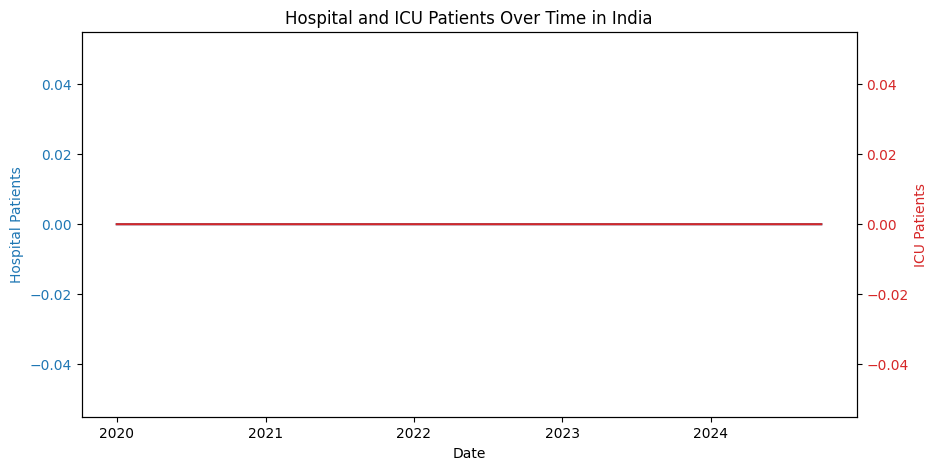

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot hospital patients on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Hospital Patients', color='tab:blue')
ax1.plot(india_data['date'], india_data['hosp_patients'], label='Hospital Patients', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for ICU patients
ax2 = ax1.twinx()
ax2.set_ylabel('ICU Patients', color='tab:red')
ax2.plot(india_data['date'], india_data['icu_patients'], label='ICU Patients', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Hospital and ICU Patients Over Time in India')
plt.show()


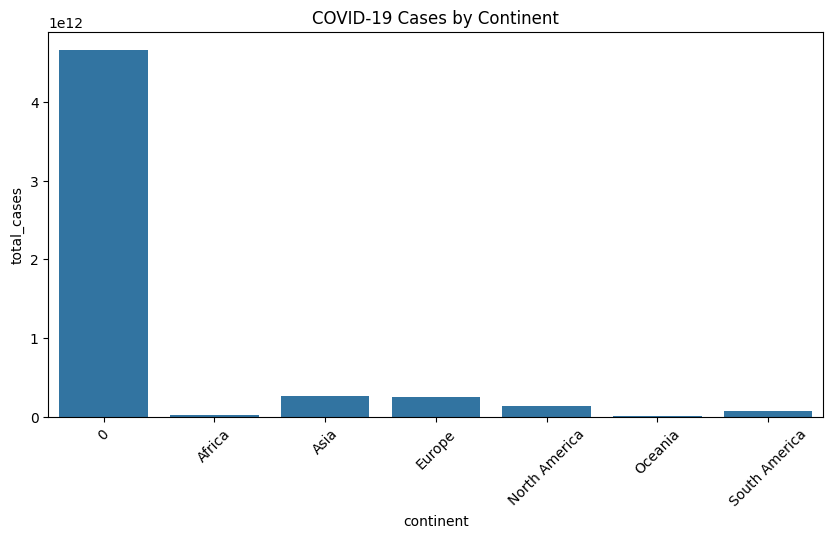

In [ ]:
# Group by continent and sum cases
continent_data = df.groupby('continent').agg({'total_cases':'sum', 'total_deaths':'sum', 'total_vaccinations':'sum'}).reset_index()

# Bar plot for continents
plt.figure(figsize=(10, 5))
sns.barplot(x='continent', y='total_cases', data=continent_data)
plt.title('COVID-19 Cases by Continent')
plt.xticks(rotation=45)
plt.show()
